In [ ]:
import os
import pandas as pd

# import matplotlib.pyplot as plt

# ---------------- CONFIG ----------------
# Số lượng mẫu mong muốn
TARGET_HARMFUL = 650
TARGET_NOT_HARMFUL = 350

# --- Tự động tìm đường dẫn ---
ROOT_DIR = (
    os.path.dirname(os.path.abspath(__file__))
    if "__file__" in globals()
    else os.getcwd()
)
CRAWL_DIR = os.path.join(ROOT_DIR, "data_viet", "crawl")

# File Input (File master lớn 4000 dòng)
INPUT_CSV_BIG = os.path.join(CRAWL_DIR, "tiktok_links_viet.csv")

# File Output (File mẫu 1000 dòng)
OUTPUT_CSV_SMALL = os.path.join(CRAWL_DIR, "sub_tiktok_links_viet.csv")

# Dùng một số cố định (42) để đảm bảo script luôn lấy
# cùng một mẫu ngẫu nhiên mỗi khi chạy.
RANDOM_SEED = 42

print("ROOT_DIR: ", ROOT_DIR)
print("CRAWL_DIR: ", CRAWL_DIR)
print("INPUT_CSV_BIG: ", INPUT_CSV_BIG)
print("OUTPUT_CSV_SMALL: ", OUTPUT_CSV_SMALL)


ROOT_DIR:  /home/guest/Projects/SE363/UIT-SE363-Big-Data-Platform-Application-Development
CRAWL_DIR:  /home/guest/Projects/SE363/UIT-SE363-Big-Data-Platform-Application-Development/data_viet/crawl
INPUT_CSV_BIG:  /home/guest/Projects/SE363/UIT-SE363-Big-Data-Platform-Application-Development/data_viet/crawl/tiktok_links_viet.csv
OUTPUT_CSV_SMALL:  /home/guest/Projects/SE363/UIT-SE363-Big-Data-Platform-Application-Development/data_viet/crawl/sub_tiktok_links_viet.csv


# EDA function

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def eda_tiktok_advanced_labelwise(df, top_n_per_label=5, random_seed=42):
    """
    Hàm EDA nâng cao cho dataset TikTok với top hashtags riêng theo label.

    Args:
        df (pd.DataFrame): DataFrame có các cột ['hashtag', 'link', 'label']
        top_n_per_label (int): số lượng hashtag hàng đầu cho mỗi label
        random_seed (int): để cố định khi cần shuffle
    """
    print("=== Thông tin cơ bản ===")
    display(df.info())
    print("\n=== 10 dòng đầu tiên ===")
    display(df.head(10))

    print("\n=== Thống kê mô tả ===")
    display(df.describe(include="all"))

    # --- Phân bố nhãn ---
    print("\n=== Phân bố nhãn (label) ===")
    label_counts = df["label"].value_counts()
    print(label_counts)

    plt.figure(figsize=(6, 6))
    label_counts.plot(
        kind="pie", autopct="%1.1f%%", startangle=90, colors=["#66b3ff", "#ff9999"]
    )
    plt.title("Phân bố nhãn (label)")
    plt.ylabel("")
    plt.show()

    # --- Top hashtags riêng cho từng label ---
    # --- Top hashtags riêng cho từng label ---
    print(f"\n=== Top {top_n_per_label} hashtags cho từng label ===")
    top_hashtags_list = []
    for lbl in df["label"].unique():
        top_lbl = df[df["label"] == lbl]["hashtag"].value_counts().head(top_n_per_label)
        print(f"\nLabel = {lbl}:")
        display(top_lbl)
        top_hashtags_list.extend(top_lbl.index.tolist())

    # Lấy unique hashtags từ cả 2 label
    top_hashtags_list = list(set(top_hashtags_list))

    # --- Chuẩn bị data cho barplot theo label ---
    df_top_plot = df[df["hashtag"].isin(top_hashtags_list)]
    # Tạo bảng count theo hashtag và label
    top_counts = (
        df_top_plot.groupby(["hashtag", "label"]).size().reset_index(name="count")
    )

    # --- Bar chart với 2 màu cho 2 label ---
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x="count",
        y="hashtag",
        hue="label",
        data=top_counts,
        palette=["#66b3ff", "#ff9999"],
    )
    plt.xlabel("Số lượng")
    plt.ylabel("Hashtag")
    plt.title(f"Tổng số lượng hashtags top {top_n_per_label} mỗi label")
    plt.legend(title="Label")
    plt.show()

    # --- Mối quan hệ label vs top hashtags ---
    df_top = df[df["hashtag"].isin(top_hashtags_list)]
    pivot = df_top.pivot_table(
        index="hashtag", columns="label", aggfunc="size", fill_value=0
    )
    print("\n=== Pivot table label vs hashtag ===")
    display(pivot)

    # Stacked bar chart với legend
    ax = pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
    plt.title(f"Label vs Top {top_n_per_label} hashtags mỗi label")
    plt.ylabel("Số lượng")
    plt.xlabel("Hashtag")
    plt.xticks(rotation=45)
    plt.legend(title="Label")
    plt.show()


# 1. Đọc file

Đang đọc file sample lớn: /home/guest/Projects/SE363/UIT-SE363-Big-Data-Platform-Application-Development/data_viet/crawl/tiktok_links_viet.csv...
=== Thông tin cơ bản ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6739 entries, 0 to 6738
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  6739 non-null   object
 1   link     6739 non-null   object
 2   label    6739 non-null   object
dtypes: object(3)
memory usage: 158.1+ KB


None


=== 10 dòng đầu tiên ===


,hashtag,link,label
0,gaixinh,https://www.tiktok.com/@hoaithuongg2k1/video/7...,harmful
1,gaixinh,https://www.tiktok.com/@cat..kawaii102/video/7...,harmful
2,gaixinh,https://www.tiktok.com/@ki_eu.vy/video/7543942...,harmful
3,gaixinh,https://www.tiktok.com/@user5295118539753/vide...,harmful
4,gaixinh,https://www.tiktok.com/@ainghum/video/75526224...,harmful
5,gaixinh,https://www.tiktok.com/@vitamin.gi.xinh77/vide...,harmful
6,gaixinh,https://www.tiktok.com/@phuowq_ank2409/video/7...,harmful
7,gaixinh,https://www.tiktok.com/@dn3112_/video/75254481...,harmful
8,gaixinh,https://www.tiktok.com/@_lethihau.1301_/video/...,harmful
9,gaixinh,https://www.tiktok.com/@bong68688/video/758034...,harmful



=== Thống kê mô tả ===


,hashtag,link,label
count,6739,6739,6739
unique,62,6739,2
top,nauan,https://www.tiktok.com/@thanhtuan201297/video/...,harmful
freq,119,1,3853



=== Phân bố nhãn (label) ===
label
harmful        3853
not_harmful    2886
Name: count, dtype: int64


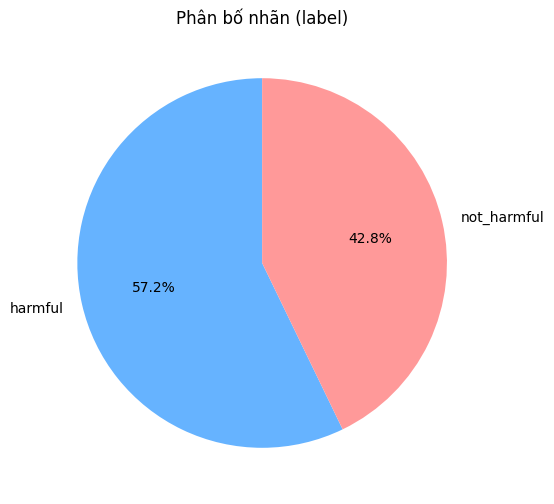


=== Top 10 hashtags cho từng label ===

Label = harmful:


hashtag
chửi_bậy            118
gọi_vong            118
no_hu               117
drama_showbiz       117
dân_chơi            116
bốc_bát_họ          116
hut_thuoc           116
lừa_đảo             116
kiem_tien_online    116
bay_lắc             115
Name: count, dtype: int64


Label = not_harmful:


hashtag
nauan                119
canh_dep             117
vui_ve               117
meo_vat              117
hoc_tieng_anh        117
cho_cung             117
gia_dinh             116
kien_thuc            116
lich_su_viet_nam     115
nhac_hay_moi_ngay    115
Name: count, dtype: int64

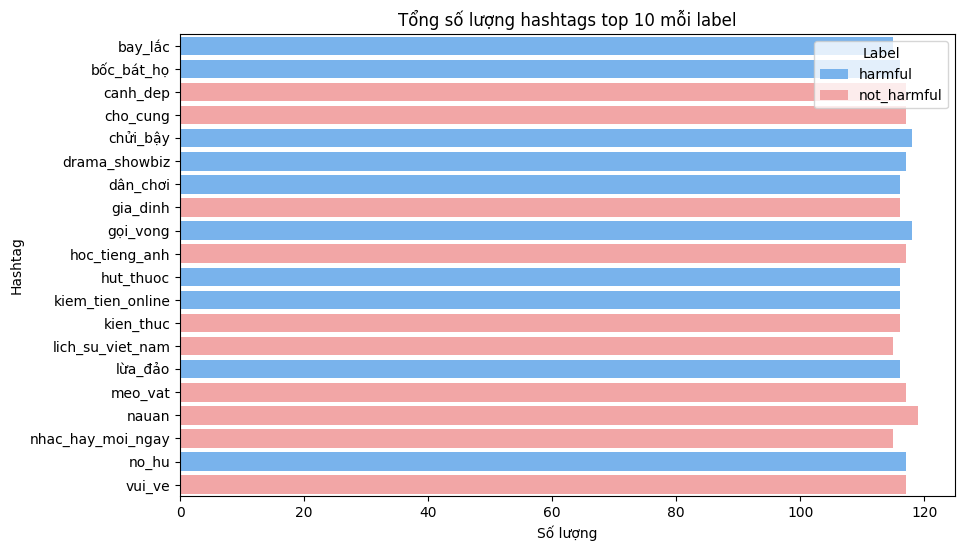


=== Pivot table label vs hashtag ===


label,harmful,not_harmful
hashtag,,
bay_lắc,115,0
bốc_bát_họ,116,0
canh_dep,0,117
cho_cung,0,117
chửi_bậy,118,0
drama_showbiz,117,0
dân_chơi,116,0
gia_dinh,0,116
gọi_vong,118,0


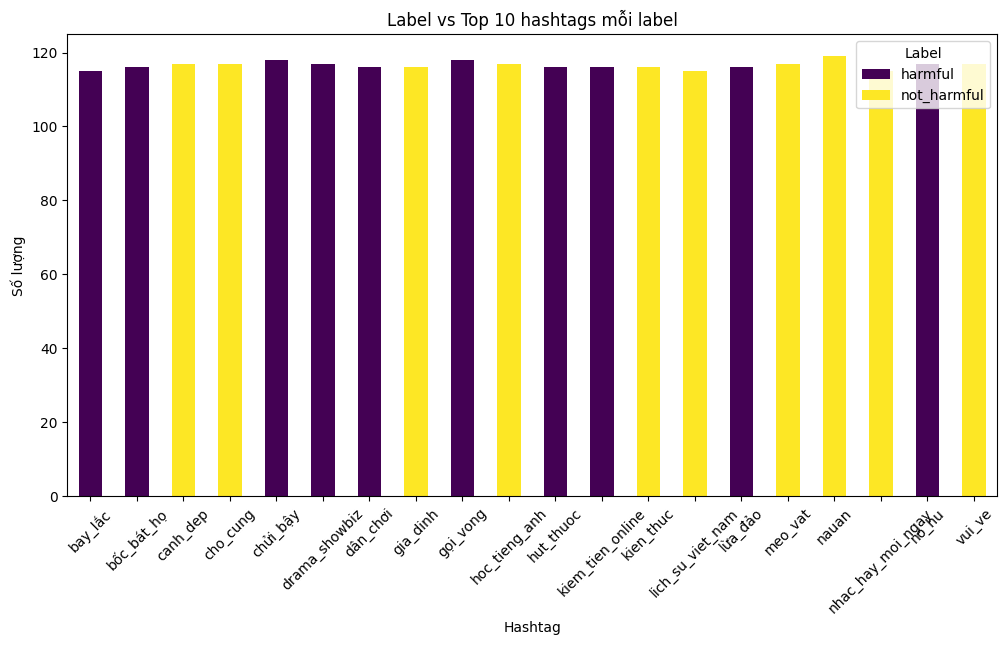

Đã tải 6739 link.


In [ ]:
print(f"Đang đọc file sample lớn: {INPUT_CSV_BIG}...")


try:
    df = pd.read_csv(INPUT_CSV_BIG)
    eda_tiktok_advanced_labelwise(df, top_n_per_label=10)
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file {INPUT_CSV_BIG}")
    print("Bạn cần chạy script 'find_tiktok_links.py' trước để tạo file này.")
except Exception as e:
    print(f"Lỗi khi đọc file CSV: {e}")

print(f"Đã tải {len(df)} link.")


# 2. Phân loại

In [ ]:
# --- Chỉ lấy link video ---
df = df[df["link"].str.contains("/video/")]


# --- Lọc theo label ---
df_harmful = df[df["label"] == "harmful"]
df_not_harmful = df[df["label"] == "not_harmful"]

print(f"-> Tìm thấy {len(df_harmful)} harmful và {len(df_not_harmful)} not_harmful.")


-> Tìm thấy 3853 harmful và 2886 not_harmful.


In [ ]:
print("Harmful label")
display(df_harmful.head(5))

print("Not harmful label")
display(df_not_harmful.head(5))


Harmful label


,hashtag,link,label
0,gaixinh,https://www.tiktok.com/@hoaithuongg2k1/video/7...,harmful
1,gaixinh,https://www.tiktok.com/@cat..kawaii102/video/7...,harmful
2,gaixinh,https://www.tiktok.com/@ki_eu.vy/video/7543942...,harmful
3,gaixinh,https://www.tiktok.com/@user5295118539753/vide...,harmful
4,gaixinh,https://www.tiktok.com/@ainghum/video/75526224...,harmful


Not harmful label


,hashtag,link,label
3853,mon_ngon_moi_ngay,https://www.tiktok.com/@baoyennaucom/video/739...,not_harmful
3854,mon_ngon_moi_ngay,https://www.tiktok.com/@vuthi5555/video/756241...,not_harmful
3855,mon_ngon_moi_ngay,https://www.tiktok.com/@bepam6886/video/728906...,not_harmful
3856,mon_ngon_moi_ngay,https://www.tiktok.com/@duyn.food/video/748632...,not_harmful
3857,mon_ngon_moi_ngay,https://www.tiktok.com/@xuanx_9898/video/74512...,not_harmful


In [ ]:
# 3. Xử lý nếu không đủ mẫu
# (Ví dụ: file master chỉ có 300 'harmful' dù ta muốn 450)
n_harmful = min(TARGET_HARMFUL, len(df_harmful))
n_not_harmful = min(TARGET_NOT_HARMFUL, len(df_not_harmful))

print(f"-> Sẽ lấy {n_harmful} harmful và {n_not_harmful} not_harmful.")


-> Sẽ lấy 650 harmful và 350 not_harmful.


In [ ]:
# 4. Lấy mẫu (sample)
df_harmful_sample = df_harmful.sample(n=n_harmful, random_state=RANDOM_SEED)
df_not_harmful_sample = df_not_harmful.sample(n=n_not_harmful, random_state=RANDOM_SEED)
print("df_harmful_sample:")
display(df_harmful_sample.describe(include="all"))
print("df_not_harmful_sample:")
display(df_not_harmful_sample.describe(include="all"))


df_harmful_sample:


,hashtag,link,label
count,650,650,650
unique,36,650,1
top,check_var,https://www.tiktok.com/@cvonlinethuynga24h/vid...,harmful
freq,29,1,650


df_not_harmful_sample:


,hashtag,link,label
count,350,350,350
unique,26,350,1
top,sach_hay,https://www.tiktok.com/@nhuttiensinh/video/757...,not_harmful
freq,20,1,350


# 5. Gộp lại

In [ ]:
df_final = pd.concat([df_harmful_sample, df_not_harmful_sample], ignore_index=True)


# 6. TRỘN LẪN (SHUFFLE) - Rất quan trọng

In [ ]:
# Trộn các dòng harmful và not_harmful với nhau
df_shuffled = df_final.sample(frac=1, random_state=RANDOM_SEED).reset_index(drop=True)

print("df_final:")
display(df_final.head(5))
display(df_final.info())
display(df_final.describe(include="all"))


df_final:


,hashtag,link,label
0,hut_thuoc,https://www.tiktok.com/@menghichai_qh/video/75...,harmful
1,phong_the,https://www.tiktok.com/@venus.huong/video/7554...,harmful
2,sgbb,https://www.tiktok.com/@hoaatada/video/7556887...,harmful
3,chửi_bậy,https://www.tiktok.com/@_iamk.linh_/video/7477...,harmful
4,baoluchocduong,https://www.tiktok.com/@nangdayne.02/video/758...,harmful


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  1000 non-null   object
 1   link     1000 non-null   object
 2   label    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


None

,hashtag,link,label
count,1000,1000,1000
unique,62,1000,2
top,check_var,https://www.tiktok.com/@nhuttiensinh/video/757...,harmful
freq,29,1,650


# 7. Lưu file CSV

In [ ]:
try:
    df_shuffled.to_csv(OUTPUT_CSV_SMALL, index=False, encoding="utf-8-sig")
    print(f"\n✅ HOÀN TẤT!")
    print(f"Đã lưu {len(df_shuffled)} mẫu (đã trộn) vào file:")
    print(f"{OUTPUT_CSV_SMALL}")
except Exception as e:
    print(f"\nLỖI khi lưu file CSV: {e}")



✅ HOÀN TẤT!
Đã lưu 1000 mẫu (đã trộn) vào file:
/home/guest/Projects/SE363/UIT-SE363-Big-Data-Platform-Application-Development/data_viet/crawl/sub_tiktok_links_viet.csv


# 8. KIỂM TRA DỮ LIỆU 


GIAI ĐOẠN 8: KIỂM TRA DỮ LIỆU (VERIFICATION)
Đang đọc lại file vừa lưu: sub_tiktok_links_viet.csv...

=== Thông tin cơ bản ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   hashtag  1000 non-null   object
 1   link     1000 non-null   object
 2   label    1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


None


=== 10 dòng đầu tiên ===


,hashtag,link,label
0,xăm_trổ,https://www.tiktok.com/@long_d_t/video/7532752...,harmful
1,vietnam_travel,https://www.tiktok.com/@vietnam.samurai/video/...,not_harmful
2,hanoi,https://www.tiktok.com/@_trinhhavi_/video/7576...,not_harmful
3,nhac_hay_moi_ngay,https://www.tiktok.com/@rosenhung9999/video/75...,not_harmful
4,say_ruou,https://www.tiktok.com/@canhbuom2001/video/734...,harmful
5,hai_huoc,https://www.tiktok.com/@blogtamsu.nghenghiep/v...,not_harmful
6,tam_linh,https://www.tiktok.com/@giaimatamthucc/video/7...,harmful
7,soi_kèo,https://www.tiktok.com/@dinhmanh686/video/7255...,harmful
8,dalat,https://www.tiktok.com/@vi.nguyn6125/video/750...,not_harmful
9,boc_phot,https://www.tiktok.com/@no1donganhhihi/video/7...,harmful



=== Thống kê mô tả ===


,hashtag,link,label
count,1000,1000,1000
unique,62,1000,2
top,check_var,https://www.tiktok.com/@ginabaos/video/7525080...,harmful
freq,29,1,650



=== Phân bố nhãn (label) ===
label
harmful        650
not_harmful    350
Name: count, dtype: int64


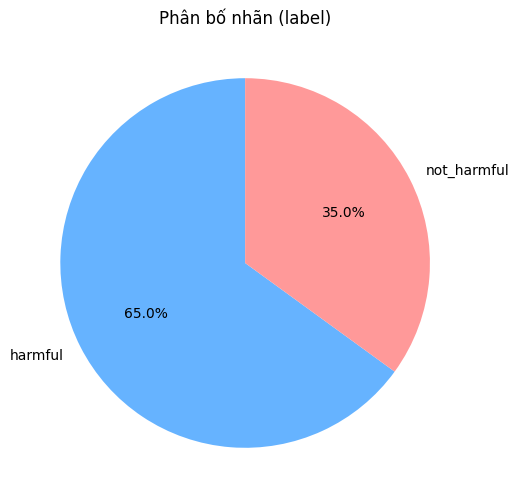


=== Top 10 hashtags cho từng label ===

Label = harmful:


hashtag
check_var        29
sugarbaby        25
drama_showbiz    25
no_hu            24
phong_the        24
sgbb             24
tam_linh         23
dân_chơi         22
giang_hồ         21
nhậu_nhẹt        21
Name: count, dtype: int64


Label = not_harmful:


hashtag
sach_hay               20
phat_trien_ban_than    19
cho_cung               19
hanoi                  18
nauan                  18
kien_thuc              17
hoc_tieng_anh          17
gia_dinh               17
meo_con                16
lich_su_viet_nam       16
Name: count, dtype: int64

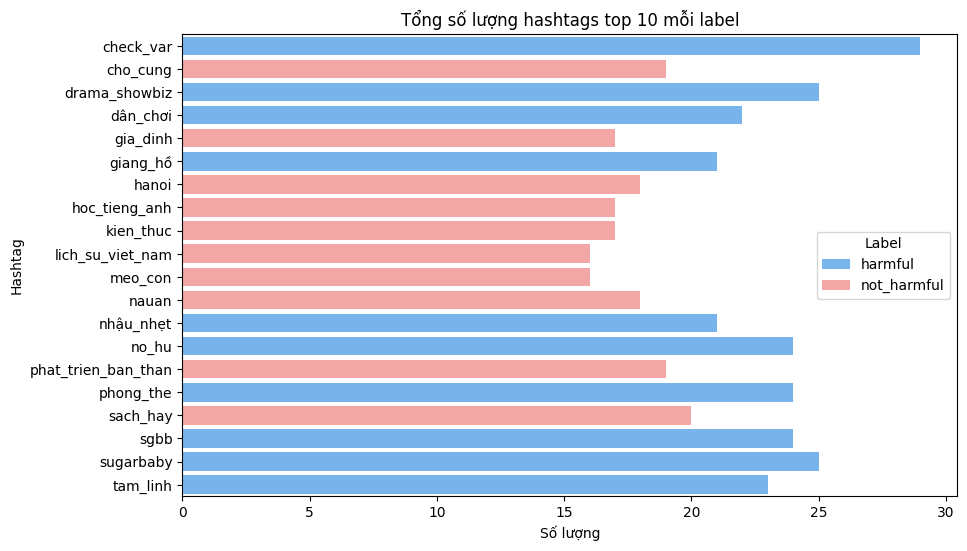


=== Pivot table label vs hashtag ===


label,harmful,not_harmful
hashtag,,
check_var,29,0
cho_cung,0,19
drama_showbiz,25,0
dân_chơi,22,0
gia_dinh,0,17
giang_hồ,21,0
hanoi,0,18
hoc_tieng_anh,0,17
kien_thuc,0,17


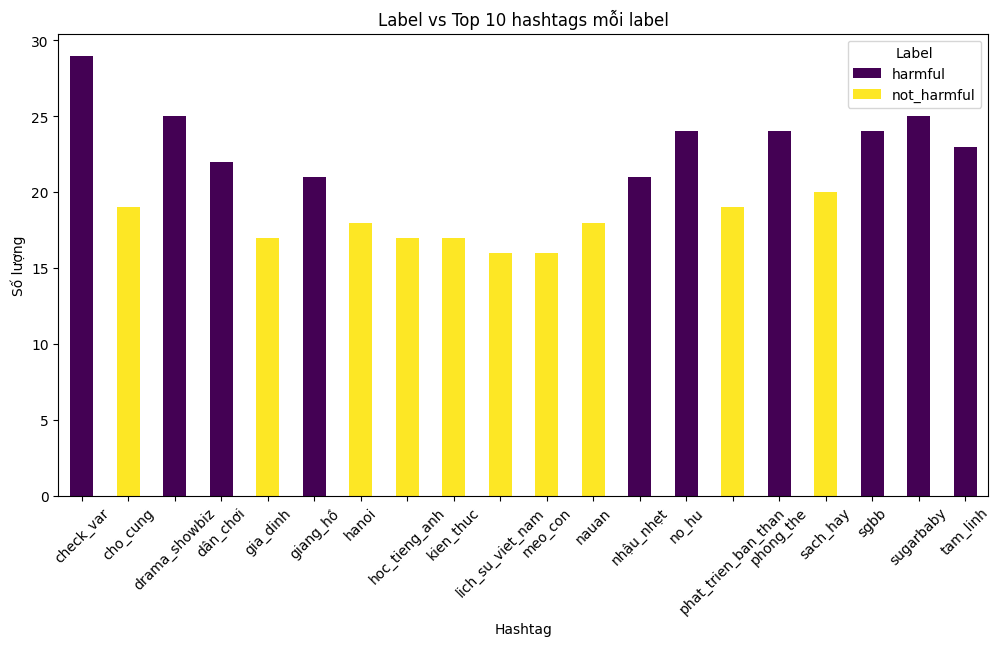


✅ Kiểm tra hoàn tất.


In [ ]:
print("\n" + "=" * 40)
print("GIAI ĐOẠN 8: KIỂM TRA DỮ LIỆU (VERIFICATION)")
print("=" * 40)
try:
    print(f"Đang đọc lại file vừa lưu: {os.path.basename(OUTPUT_CSV_SMALL)}...\n")
    df_verify = pd.read_csv(OUTPUT_CSV_SMALL)
    eda_tiktok_advanced_labelwise(df=df_verify, top_n_per_label=10)

    print("\n✅ Kiểm tra hoàn tất.")

except Exception as e:
    print(f"Lỗi khi kiểm tra dữ liệu: {e}")
